In [1]:
from Model import *

In [242]:
# Run model with set parameters. This then creates a dataframe of the results at each time-step

params = {"K": [10,100,1000], "n": 3, "w": 0.5, "alpha": 0.1, "epsilon" : 0.02, "pooling" : True, "uniform" : True}

results = mesa.batch_run(
    Model,
    parameters=params,
    iterations=30,
    max_steps=20,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

results_df = pd.DataFrame(results)

100%|███████████████████████████████████████████████████████████████████████████████████| 90/90 [00:34<00:00,  2.58it/s]


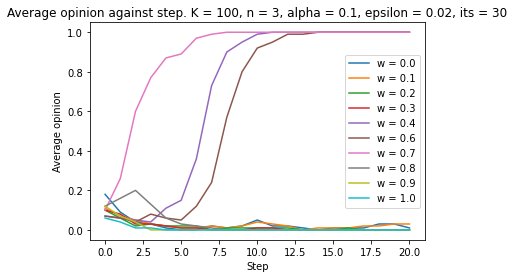

In [232]:
# Plotting average opinion of agents against time step, emulating the simulation run in Figure 2 on Chanelle's opinion pooling
# paper using the same parameters

plt.figure()
admired_cols = ['Step', 'Consensus']

for w in params["w"]:
    data = []
    results_w = results_df[results_df.w == w]
    for it in range(1):
        results_it = results_w[results_w.iteration == it]
        results_it = results_it.drop(columns = [col for col in results_it.columns if col not in admired_cols])
        results_it.drop_duplicates()
        data.append(results_it.Consensus)
    
    plt.plot(results_it.Step, np.mean(np.array(data), axis=0), label = "w = " + str(round(w,1)))
    plt.legend(loc = 5)
plt.title("Average opinion against step. K = 100, n = 3, alpha = 0.1, epsilon = 0.02, its = 30")
plt.xlabel("Step")
plt.ylabel("Average opinion")

# plt.savefig('Figures/consensus_random_starting_opinion.pdf')

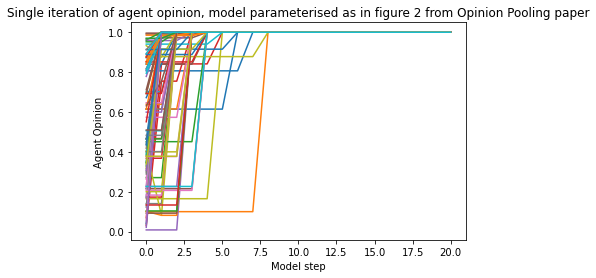

In [161]:
admired_cols = ['Step', 'Opinion']
results_0 = results_df[(results_df.iteration==0) & (results_df.w == 1)]
results_0

plt.figure()
for agentID in range(params["K"]):
    results_0_agent = results_0[results_0.AgentID == agentID]
    plt.plot(results_0_agent.Step, results_0_agent.Opinion)
plt.xlabel("Model step")
plt.ylabel("Agent Opinion")
plt.title("Single iteration of agent opinion, model parameterised as in figure 2 from Opinion Pooling paper")
plt.savefig("Figures/Single iteration of agent opinion.pdf")

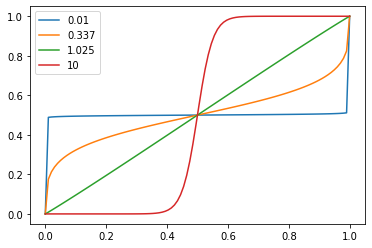

In [164]:
# Recreating figure 3 from opinion pooling paper to make sure that the pooling mechanism is implemented properly.

for w in (0.01, 0.337, 1.025, 10):
    data = []
    for x in np.linspace(0,1,100):
        c_x = x**w / (x**w + (1-x)**w)
        data.append(c_x)
    plt.plot(np.linspace(0,1,100),data, label = w)
    plt.legend()
    
plt.savefig('Figures/SProdOP_varying_w.pdf')

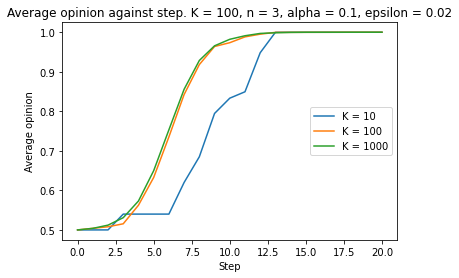

In [243]:
plt.figure()
admired_cols = ['Step', 'Average_opinion']

for k in params["K"]:
    results_k = results_df[results_df.K == k]
    data = []
    for it in range(1):
        results_it = results_k[results_k.iteration == it]
        results_it = results_it.drop(columns = [col for col in results_it.columns if col not in admired_cols])
#         results_it.drop_duplicates()
        data.append(results_it.Average_opinion)

    plt.plot(results_it.Step, np.mean(np.array(data), axis=0), label = "K = " + str(k))
    plt.legend(loc = 5)
    
plt.title("Average opinion against step. K = 100, n = 3, alpha = 0.1, epsilon = 0.02")
plt.xlabel("Step")
plt.ylabel("Average opinion")

plt.savefig('Figures/average_opinion_varying_K_uniform.pdf')